In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("pol-viol-cases - completed-cases.csv")
data.shape

(4327, 48)

In [5]:
data.isna().sum()

Date                                     0
Date descriptor                          0
Case ID                                  0
Group identifier                         1
Full legal name                          0
First name                               5
Family name                             10
Other names/aliases                   3044
Co-offender                              0
Reason for inclusion                     2
Name of case                             0
Jurisdiction                             0
Location: country                        0
Location: state                          0
Location: city                           0
People vs. property                      0
Physical target                          0
Ideological target                       0
Ideological affiliation                  0
Affiliation with FTO                     0
Group affiliation                        2
Hate crime                               6
LEO informant                            0
Previous si

In [6]:
data_processed = data.drop(columns=['Other names/aliases', 'First name', 'Family name'], axis = 1)

Q1: Does being a co-offender change the length of your sentence (in months)?

In [7]:
data_processed['Co-offender'].value_counts()

Co-offender
Yes    2858
No     1469
Name: count, dtype: int64

In [8]:
data_processed['Length of prison sentence (months)'].value_counts()

Length of prison sentence (months)
0                     593
#                     465
Data not available    304
X                     209
120                   143
                     ... 
1032                    1
272                     1
648                     1
378                     1
405                     1
Name: count, Length: 318, dtype: int64

In [9]:
data_question_1 = data_processed.drop(data_processed[
    (data_processed['Length of prison sentence (months)'] == '#') |
    (data_processed['Length of prison sentence (months)'] == 'Data not available') |
    (data_processed['Length of prison sentence (months)'] == 'X') | 
    (data_processed['Length of prison sentence (months)'] == 'Pending')
].index)

In [10]:
data_question_1['Length of prison sentence (months)'].value_counts()

Length of prison sentence (months)
0       593
120     143
60      132
12      114
24      110
       ... 
166       1
450       1
1680      1
5.5       1
226       1
Name: count, Length: 314, dtype: int64

In [11]:
data_question_1 = pd.DataFrame(data_question_1)

In [12]:
data_question_1['Length of prison sentence (months)'] = data_question_1['Length of prison sentence (months)'].astype('float')

In [13]:
# Remove extreme outliers

q_3 = np.percentile(data_question_1['Length of prison sentence (months)'], 75)
q_1 = np.percentile(data_question_1['Length of prison sentence (months)'], 25)
IQR = q_3 - q_1

lower_bound = q_1 - (1.5 * IQR)
upper_bound =q_3 + (1.5 * IQR)

data_question_1 = data_question_1[(data_question_1['Length of prison sentence (months)'] >= lower_bound) & (data_question_1['Length of prison sentence (months)'] <= upper_bound)]


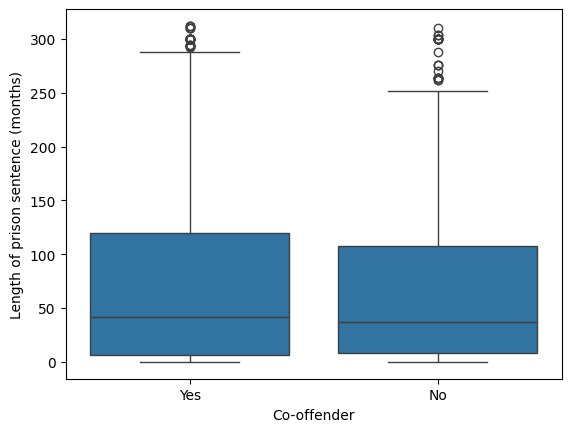

In [14]:
_ = sns.boxplot(data = data_question_1, y = 'Length of prison sentence (months)', x = 'Co-offender')